# Plotly graphing using FAKE stock data
Reference: from [Jorge Santos](https://plot.ly/~jorgesantos/3393/gs-moving-average-volume-bollinger-bands/#code)

In [1]:
# imports for data manipulation
import pandas as pd
import numpy as np
import ta

In [2]:
# Plotly imports
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [3]:
np.random.seed(10)

# generate ohlc data
days = 500
dates = pd.date_range('20180101', periods=days)

# . generate close
steps = np.random.normal(loc=0, scale=1.0, size=days)
steps[0]=0 # set the first step to 0
c = 72 + np.cumsum(steps) # simulate daily close starting from 72

# . generate opens

# . change between close and open
c_o_change = np.random.uniform(low=-0.05, high=0.05, size=days-1)

o=c[:-1]*c_o_change+c[:-1] # open
o=np.append(72.3, o)

h_change = np.random.normal(loc=0, scale=0.008, size=days)
l_change = np.random.uniform(low=-0.008, high=-0.01, size=days)

# . high and low
h=pd.DataFrame([o, c]).max()*(1+abs(h_change))
l=pd.DataFrame([o, c]).min()*(1-abs(l_change))

# . generate the bollinger bands
bb=ta.volatility.BollingerBands(close=pd.Series(c), n=20, ndev=2)

bb_ma=bb.bollinger_mavg()
bb_hi=bb.bollinger_hband()
bb_lo=bb.bollinger_lband()

volume = abs(np.random.normal(loc=500000, scale=499999, size=days).astype('int'))

df=pd.DataFrame({'date': dates, 'open': o, 'high': h, 'low': l, 'close': c, 'volume': volume,
                 'bb_ma': bb_ma, 'bb_hi': bb_hi, 'bb_lo': bb_lo})

In [4]:
df

,date,open,high,low,close,volume,bb_ma,bb_hi,bb_lo
0,2018-01-01,72.300000,72.783241,71.291271,72.000000,191895,NaN,NaN,NaN
1,2018-01-02,72.921513,73.357836,72.023951,72.715279,521467,NaN,NaN,NaN
2,2018-01-03,73.684400,74.062499,70.549987,71.169879,943231,NaN,NaN,NaN
3,2018-01-04,69.769818,71.432672,69.144806,71.161495,930929,NaN,NaN,NaN
4,2018-01-05,73.412815,74.159161,71.078967,71.782831,186510,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
495,2019-05-11,88.123011,89.587983,86.122274,86.913448,1239282,87.041374,88.758415,85.324334
496,2019-05-12,89.181439,89.692494,86.219080,86.969763,692222,86.979700,88.611891,85.347509
497,2019-05-13,83.767324,88.263665,82.992540,87.515547,536449,86.983206,88.619679,85.346733
498,2019-05-14,84.501309,87.432225,83.662950,86.832425,663581,86.904166,88.403702,85.404630


In [5]:
# Generate graph
import plotly.graph_objects as go

# make the traces
# . ohlc chandle-stick trace
trace1 = {
    "name": "FAKE",
    "type": "candlestick",
    "x": dates,
    "yaxis": "y",
    "low": l,
    "high": h,
    "open": o,
    "close": c,
    "decreasing": {"line":{"color": "#7F7F7F"}},
    "increasing": {"line":{"color": "#17BECF"}}
}

# . moving average trace
trace2 = {
    "name": "Moving Average",
    "type": "scatter",
    "mode": "lines",
    "line": {"width": 1},
    "x": dates,
    "y": bb_ma,
    "yaxis": "y",
    "marker": {"color": "#E377C2"}
}

# . upper bollinger trace
trace3 = {
    "name": "Bollinger Bands",
    "type": "scatter",
    "mode": "lines",
    "line": {"width": 1},
    "x": dates,
    "y": bb_hi,
    "yaxis": "y",
    "marker": {"color": "#ccc"},
    "hoverinfo": "none",
    "legendgroup": "Bollinger Bands"
}

# . lower bollinger trace
trace4 = {
    "name": "Bollinger Bands",
    "type": "scatter",
    "mode": "lines",
    "line": {"width": 1},
    "x": dates,
    "y": bb_lo,
    "yaxis": "y",
    "marker": {"color": "#ccc"},
    "hoverinfo": "none",
    "legendgroup": "Bollinger Bands",
    "showlegend": False
}

# . volume trace
# .. generate random colors for volume
color_array = ["#7F7F7F", "#17BECF"]
vol_colors = np.random.choice(color_array, days)

trace5 = {
    "name": "Volume",
    "type": "bar",
    "x": dates,
    "y": volume,
    "yaxis": "y2",
    "marker": {"color": vol_colors}
}

# build the data and layout

data = [trace1, trace2, trace3, trace4, trace5]

layout = {
    "xaxis": {"rangeselector":{
        "x": 0,
        "y": 1,
        "font": {"size": 13},
        "visible": True,
        "bgcolor": "rgba(150, 200, 250, 0.4)",
        "buttons": [
            {"step": "all"},
            {
                "step": "year",
                "count": 1,
                "label": "1yr",
                "stepmode": "backward"
            },            
            {
                "step": "month",
                "count": 3,
                "label": "3 mo",
                "stepmode": "backward"
            },
            {
                "step": "month",
                "count": 1,
                "label": "1 mo",
                "stepmode": "backward"
            }    
        ] 
    }
    },
      "yaxis": {
          "domain": [0.2, 1]
      },
      "legend": {
          "x": 0.3,
          "y":1,
          "yanchor": "middle",
          "orientation": "h"
      },
      "margin": {
          "b": 40,
          "l": 40,
          "r": 40,
          "t": 40
      },
      "yaxis2": {
          "domain":[0, 0.2],
          "showticklabels": False
      },
      
      "plot_bgcolor": "rgb(250, 250, 250)"
}

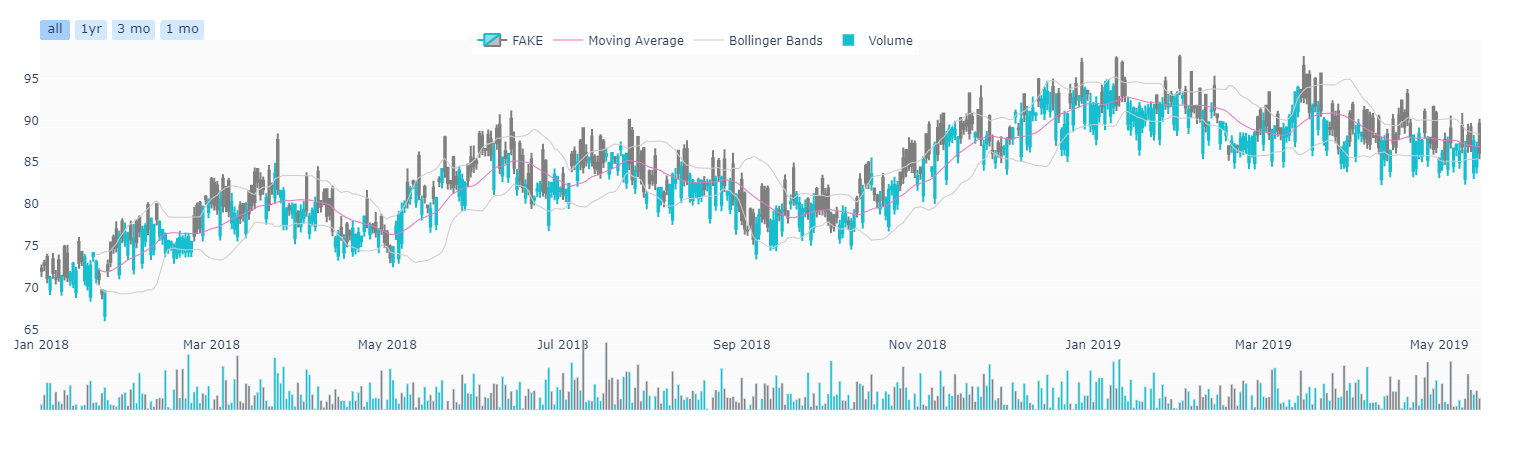

In [6]:
# show the figure

fig=go.Figure(data=data, layout=layout)
fig.update_layout({"xaxis": {"rangeslider": {"visible": False}}})
fig.show('jupyterlab')

In [7]:
## Show the figure in a browser. 
## This does not work well!! 
fig.show('browser')